In [1]:
# Dependencies and Setup
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
#from stats import mean, median, mode, multi_mode
#------------------------------------------------------
#from stats import mean, median, mode, multi_mode
#from spread import variance, standard_deviation, zipped_z_scores
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"
# Read the Mouse and Drug Data and the Clinical Trial Data
# Combine the data into a single dataset
# Display the data table for preview

In [66]:
# Read the Mouse and Drug Data and the Clinical Trial Data
Drug_df = pd.read_csv(mouse_drug_data_to_load, low_memory=False)
#Drug_df.head()


In [67]:
Trial_df = pd.read_csv(clinical_trial_data_to_load, low_memory=False)
#Trial_df
#Trial_df["Timepoint"].value_counts()

## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [68]:
#Trial_df["Mouse ID"].value_counts
#len(Trial_df["Mouse ID"])

In [70]:
# Merge the first two datasets on "ID" so that no data is lost (should be 1893 rows, with titles x 5 columns)
# Outer gives 1905 rows of DRUGS but 
combined_df = pd.merge(Drug_df, Trial_df,
                                 how='inner', on='Mouse ID')
combined_df.head()
#combined_df["Mouse ID"].value_counts

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [7]:
#combined_df.count()


#------------------------------------------------------------------------------------
#### Create a Table of Drug by Time (points) by affected Tumor Volumes i.e.
#### Store the Mean /STD ? of Tumor Volume Data Grouped by Drug and Timepoint 
#------------------------------------------------------------------------------------

In [71]:
Drug_groups = combined_df.groupby(['Drug','Timepoint'])
Drug_groups.mean()
Drug_groups.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1780,x773,Placebo,35,55.192736,4
1781,x773,Placebo,40,55.987676,4
1782,x773,Placebo,45,58.634971,4
1802,y478,Placebo,40,65.971120,1


In [73]:
# -----------------------------------------------------------------------------------
# Split up the data into groups based upon 'Drug' type
# combined_df.reset_index(inplace = True)
#
#Drug_groups = combined_df.groupby(['Drug','Timepoint'])
#Drug_groups.mean()
#    .drop_duplicates(subset='Drug ID'))  ????? Are there duplicates or do i care about duplicates???
#
# Split up the data into groups based upon 'Drug' type
#combined_df.reset_index(inplace = True)
tumor_vol = Drug_groups.mean()['Tumor Volume (mm3)']
metaStatic = Drug_groups.mean()['Metastatic Sites']
#tumor_vol = Drug_groups.mean()['Tumor Volume (mm3)']
# ---------------------------------------------------------------------------------------
# ----------->>>>>>    Create a data frame from the series   <<<<<<----------------------
# ---------------------------------------------------------------------------------------
tumor_vol = pd.DataFrame(tumor_vol)
tumor_vol.reset_index(inplace = True)
tumor_vol.head()
# -----------------------------------------------------------------------------------



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [111]:
# calculate the standard error using the grouped by table we created
sem_tumor_volume = Drug_groups.sem()['Tumor Volume (mm3)']
mean_tumor_volume = Drug_groups.mean()['Tumor Volume (mm3)']
# convert to a df
sem_tumor_volume = pd.DataFrame(sem_tumor_volume)
mean_tumor_volume = pd.DataFrame(mean_tumor_volume)
# reset index to flatten out
sem_tumor_volume.reset_index(inplace = True)
mean_tumor_volume.reset_index(inplace = True)

In [112]:
# create a pivot formating rows as timepoint and columns as drug
sem_tumor_volume = sem_tumor_volume.pivot(index = 'Timepoint',
                                          columns = 'Drug')['Tumor Volume (mm3)']
sem_tumor_volume.head()
#mean_tumor_volume=sem_tumor_volume_columns.mean()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [86]:
## Create a scatter plot which compares MPG to horsepower
drug_chart=sem_tumor_volume.plot(kind="scatter", x="Timepoint", y="Tumor Volume (mm3)", grid=True, figsize=(10,5),
              title="Tumor Response to Treatment")

# Create a legend for our chart
#drug_chart.legend(handles=[Drug, drug_chart], loc="best")

# label the axes
drug_chart.set_xlabel("Time in Days")
drug_chart.set_ylabel("Tumor Volumes in (mm3)")


plt.show()


KeyError: 'Timepoint'

In [78]:
plt.errorbar(mean_tumor_volume.index,
             mean_tumor_volume['Capomulin'],
             yerr = sem_tumor_volume['Capomulin'],
             color = 'b',
             marker = 'x',
             linewidth = 0.5)
# Set the index to be "Drug" so they will be used as labels
Drug_and_Tumor = tumor_vol.set_index("Drug")

Drug_and_Tumor.head()
#Drug_and_Tumor.index
#
Timepoints=Drug_and_Tumor["Timepoint"]
Timepoints

KeyError: 'Capomulin'

No handles with labels found to put in legend.


FileNotFoundError: [Errno 2] No such file or directory: 'figures/SizeVsTime.png'

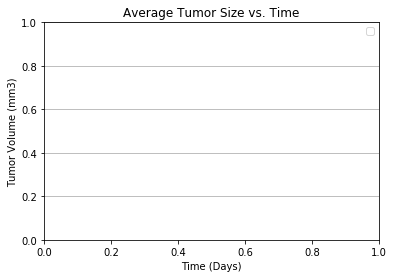

In [13]:
# make it look good
plt.title('Average Tumor Size vs. Time')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(axis = 'y')
plt.legend()
# save the figure 
plt.savefig('figures/SizeVsTime.png')
plt.show()

In [80]:
# Set the index to be "Drug" so they will be used as labels
Drug_and_Tumor = tumor_vol.set_index("Drug")

Drug_and_Tumor.head()
#Drug_and_Tumor.index
#
Timepoints=Drug_and_Tumor["Timepoint"]
Timepoints

Drug
Capomulin     0
Capomulin     5
Capomulin    10
Capomulin    15
Capomulin    20
             ..
Zoniferol    25
Zoniferol    30
Zoniferol    35
Zoniferol    40
Zoniferol    45
Name: Timepoint, Length: 100, dtype: int64

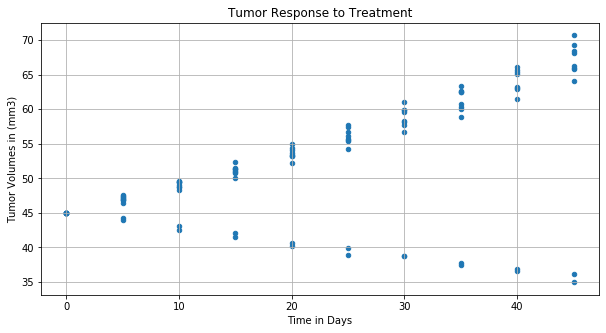

In [309]:
## Create a scatter plot which compares MPG to horsepower
drug_chart=Drug_and_Tumor.plot(kind="scatter", x="Timepoint", y="Tumor Volume (mm3)", grid=True, figsize=(10,5),
              title="Tumor Response to Treatment")
# Create a legend for our chart
#drug_chart.legend(handles=[Drug, drug_chart], loc="best")

# label the axes
drug_chart.set_xlabel("Time in Days")
drug_chart.set_ylabel("Tumor Volumes in (mm3)")


plt.show()


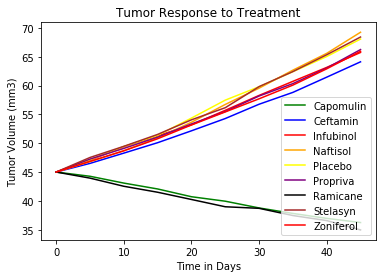

In [325]:
Timepoints=[0,5,10,15,20,25,30,35,40,45]
# Plot
Drug1, = plt.plot(Timepoints, Drug_and_Tumor.loc['Capomulin',["Tumor Volume (mm3)"]], 
                        color="green",label="Capomulin")
Drug2, = plt.plot(Timepoints, Drug_and_Tumor.loc['Ceftamin',["Tumor Volume (mm3)"]], 
                        color="blue",label="Ceftamin")
Drug3, = plt.plot(Timepoints, Drug_and_Tumor.loc['Infubinol',["Tumor Volume (mm3)"]], 
                        color="red",label='Infubinol')
Drug4, = plt.plot(Timepoints, Drug_and_Tumor.loc['Naftisol',["Tumor Volume (mm3)"]], 
                        color="orange",label='Naftisol')
Drug5, = plt.plot(Timepoints, Drug_and_Tumor.loc['Placebo',["Tumor Volume (mm3)"]], 
                        color="yellow",label='Placebo')
Drug6, = plt.plot(Timepoints, Drug_and_Tumor.loc['Propriva',["Tumor Volume (mm3)"]], 
                        color="purple",label='Propriva')
Drug7, = plt.plot(Timepoints, Drug_and_Tumor.loc['Ramicane',["Tumor Volume (mm3)"]], 
                        color="black",label='Ramicane')
Drug8, = plt.plot(Timepoints, Drug_and_Tumor.loc['Stelasyn',["Tumor Volume (mm3)"]], 
                        color="brown",label='Stelasyn')
Drug9, = plt.plot(Timepoints, Drug_and_Tumor.loc['Zoniferol',["Tumor Volume (mm3)"]], 
                        color="red",label='Zoniferol')

#--------------------------------------------------------------------------------------------
#Drug_two, = plt.plot(x_axis, Drug_and_Tumor.loc['Ceftamin',["Tumor Volume (mm3)"]], 
#                        color="blue",label=Drug_and_Tumor.loc['Ceftamin',"Tumor Volume (mm3)"])
# Create a legend for our chart
#--------------------------------------------------------------------------------------------
plt.legend(handles=[Drug1, Drug2, Drug3, Drug4, Drug5,Drug6,Drug7,Drug8,Drug9], loc="best")

plt.title("Tumor Response to Treatment")
plt.xlabel("Time in Days")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


In [326]:
# Filter the DataFrame down only to those columns to chart
Drug_and_Tumor = tumor_vol[["Drug","Tumor Volume (mm3)"]]



In [327]:
combined_df

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


In [328]:
#combined_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
combined_df.pivot_table(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [329]:
x=combined_df.pivot_table(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')


In [330]:
# ---------------------------------------------------------------------------------------------
# ----------->>>>>>    Create a data frame from the Pivot Table    <<<<<<----------------------
# ---------------------------------------------------------------------------------------------
tumor_vol = pd.DataFrame(tumor_vol)
tumor_vol.reset_index(inplace = True)
tumor_vol.head(12)

,level_0,index,Drug,Timepoint,Tumor Volume (mm3)
0,0,0,Capomulin,0,45.000000
1,1,1,Capomulin,5,44.266086
2,2,2,Capomulin,10,43.084291
3,3,3,Capomulin,15,42.064317
4,4,4,Capomulin,20,40.716325
5,5,5,Capomulin,25,39.939528
6,6,6,Capomulin,30,38.769339
7,7,7,Capomulin,35,37.816839
8,8,8,Capomulin,40,36.958001
9,9,9,Capomulin,45,36.236114


In [331]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
## Convert to DataFrame
# Preview DataFrame

In [332]:
# Make a variable called drug_id and store a 'drugid' in it
drug_id = "Capomulin"
# Collect the timepoints of the above 'Drug' 
#just_one_drug = Drug_groups.loc[drug_id]
just_one_drug = x[drug_id]
just_one_drug
# Place the timepoints for that single drug into a list
#timepoint_list = just_one_drug.keys()
#timepoint_list

Timepoint
0     45.000000
5     44.266086
10    43.084291
15    42.064317
20    40.716325
25    39.939528
30    38.769339
35    37.816839
40    36.958001
45    36.236114
Name: Capomulin, dtype: float64

In [333]:
#Drug_one, = plt.plot(Timepoint, Drug_and_Tumor.loc['Capomulin',["Tumor Volume (mm3)"]], 
#                        color="green",label=Drug_and_Tumor.loc['Capomulin',"Tumor Volume (mm3)"])
#from stats import mean, median, mode, multi_mode
#from spread import variance, standard_deviation, zipped_z_scores

In [334]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [335]:
# Set the 'Timepoint' as our index
combined_df2 = combined_df.set_index('Timepoint')
combined_df2
#new_df = combined_df["Drug"]
#new_df
# Drop or select specific columnes by reorganizing the DF

,Mouse ID,Drug,Tumor Volume (mm3),Metastatic Sites
Timepoint,,,,
0,f234,Stelasyn,45.000000,0
5,f234,Stelasyn,47.313491,0
10,f234,Stelasyn,47.904324,0
15,f234,Stelasyn,48.735197,1
20,f234,Stelasyn,51.112713,2
...,...,...,...,...
0,j235,Placebo,45.000000,0
5,j235,Placebo,46.588820,0
10,j235,Placebo,48.018788,1


In [336]:
#stelasyn["Drugs"]= [combined_df2["Drug"] = Stelasyn]
#stelasyn

In [337]:
combined_df["Timepoint"]
x_axis=combined_df2.index
x_axis
combined_df

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


In [338]:
def summarize(title, arr):
    print(f"Summarizing {title}")
    print(f"Variance: {variance(arr)}")
    print(f"Standard Deviation: {standard_deviation(arr)}")
    print(f"Z-Scores: {zipped_z_scores(arr)}")
    print("======")

In [339]:
# Generate the Plot (with Error Bars)
# Save the Figure

In [340]:
# Create a handle for each plot
#Drug, = plt.plot(x_axis, tumor_vol, marker="+",color="blue", linewidth=1, label="Drug")
#plt.legend(handles=[Drug], loc="best")
#celcius, = plt.plot(x_axis, points_C, marker="s", color="Red", linewidth=1, label="Celcius")
#plt.legend(handles=[fahrenheit, celcius], loc="best")

In [341]:
# Convert the "X" column to numeric so the data can be used ???
# combined_df2['Timepoint'] = pd.to_numeric(combined_df2['Timepoint'])  
#

Text(0, 0.5, 'Tumor Volume')

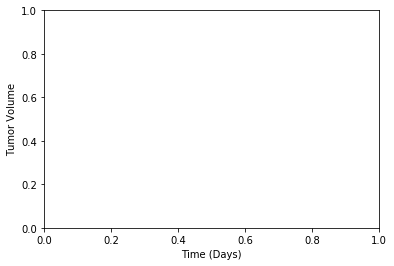

In [342]:
# Create labels for the X and Y axis
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume")

In [343]:
# Split up our data into groups based upon Drug & Timepoint
#drug_groups = combinded_df2.groupby(['Drug','Timepoint'])

# Create a new variable that holds the sum of our groups
#sum_it_up = drug_groups.sum()
#sum_it_up.head(12)

In [344]:
## Create a scatter plot which compares Drugs to Timepoint~!!!
#combined_df2.plot(kind="scatter", x="Drug", y="Timepoint", grid=True, figsize=(20,10),
#              title="Plot with error bars!")
#plt.show()

In [345]:
#---------------------------------------------------------------------------------------
#       Create a bar chart based off of the group series 
#--------------------------------------------------------------------------------------
#drug_chart = Drug_groups.plot(kind='bar')

# Set the xlabel and ylabel using class methods
#drug_chart.set_xlabel("Timepoint")
#drug_chart.set_ylabel("Tumor_vol")


#plt.show()
#plt.tight_layout()

In [346]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment (alemi2)

In [347]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [348]:
#combined_df
# create a pivot formating rows as timepoint and columns as drug
#metastatic_response = combined_df.pivot(index = 'Timepoint',
#                                          columns = 'Drug')['Metastatic Sites']
#metastatic_response.head(10)

#combined_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
metastatic_response = combined_df.pivot_table(index='Timepoint', columns='Drug', values='Metastatic Sites')
metastatic_response.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [349]:
# Split up the data into groups based upon 'Drug' type and meta statics
metaStatic_mean = Drug_groups.mean()['Metastatic Sites']
# ---------------------------------------------------------------------------------------
# >>>>>>                     Create a data frame from the series                  <<<<<<
# ---------------------------------------------------------------------------------------
meta_stat_DF = pd.DataFrame(metaStatic_mean)
meta_stat_DF.reset_index(inplace = False)
meta_stat_DF.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [350]:
# Split up the data into groups based upon 'Drug' type 
#Drug_groups = combined_df.groupby(['Drug','Timepoint'])
#    .drop_duplicates(subset='Mouse ID'))
#Meta_Sites = Drug_groups['Metastatic Sites'].mean()
#Meta_Sites.head()

In [351]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 


# Convert to DataFrame

# Preview DataFrame


In [352]:
metaStatic_sem = Drug_groups.sem()['Metastatic Sites']
# ---------------------------------------------------------------------------------------
# >>>>>>           Create a data frame2 based on standard error .                  <<<<<<
# ---------------------------------------------------------------------------------------
meta_stat_DF2 = pd.DataFrame(metaStatic_sem)
meta_stat_DF2.reset_index(inplace = False)
meta_stat_DF2.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [353]:
# variance of the specific column
combined_df.loc[:,"Metastatic Sites"].var()
# Meta_Sites.loc[:,"Metastatic Sites"].var()

1.290476269165198

In [354]:
#----------------------------------------------------------------------------------------
#                    Minor Data Munging to Re-Format the Data Frames
#                     Preview that Reformatting worked
#----------------------------------------------------------------------------------------

In [355]:
metastatic_response2 = meta_stat_DF2.pivot_table(index='Timepoint', columns='Drug', values='Metastatic Sites')
metastatic_response2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [356]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [357]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric) ?

# Convert to DataFrame ? use indexing?

# Preview DataFrame


In [358]:
mouse_count =Drug_groups.count()['Mouse ID']

In [359]:

# ---------------------------------------------------------------------------------------
# ----------->>>>>>    Create a data frame from the series   <<<<<<----------------------
# ---------------------------------------------------------------------------------------
mouse_count = pd.DataFrame(mouse_count)
mouse_count.reset_index(inplace = True)
mouse_count.head(12)
# -----------------
mc2=mouse_count
#del mc2['level_0']
mc2.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [360]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [361]:
mc3 = mouse_count.rename(columns={"Mouse ID":"Mouse Count"})
mc3.head()
maxmouse=mc3["Mouse Count"].max()
mc3["Mouse %Count"] = 100*mc3["Mouse Count"]/25
mc3.head()



,Drug,Timepoint,Mouse Count,Mouse %Count
0,Capomulin,0,25,100.0
1,Capomulin,5,25,100.0
2,Capomulin,10,25,100.0
3,Capomulin,15,24,96.0
4,Capomulin,20,23,92.0


In [362]:
# create a pivot formating rows as timepoint and columns as drug
mouse_survival = mc3.pivot(index = 'Timepoint',
                                          columns = 'Drug')['Mouse Count']
mouse_survival.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [363]:
#----------------------------------------------------------------------------------------------------
# convert the above Pivot Table to a DF
ms_DF = pd.DataFrame(mouse_survival)
# reset index to flatten out (Note this can create problems in reruns!!!!!, as Timepoint sets for index)
# .   if TimePoints was the imdex...., we need it as a column to extract it for the charts (inplace=False)
ms_DF.reset_index(inplace = True)
ms_DF
# Remove the 'old index' column, if need be!
#del ms_DF['index']

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17
5,25,22,18,18,19,18,17,14,23,19,16
6,30,22,16,17,18,15,15,13,23,18,15
7,35,22,14,12,17,15,14,10,21,16,14
8,40,21,14,10,15,15,12,9,20,12,14
9,45,21,13,9,11,13,11,7,20,11,14


In [364]:
#-----------------------------------------------------------------------------------------------
#       Calculate the %Survival from Time zero thru 45 for each of the Drug Columns
#-----------------------------------------------------------------------------------------------
ms_DF.reset_index(inplace = True)


TABpercent=[]
#TABs=[]
TABfirst=ms_DF.loc[0,["Capomulin","Ceftamin","Infubinol","Naftisol","Placebo","Propriva",
                  "Ramicane","Stelasyn","Zoniferol"]]

TABfirst
TABpercent = ms_DF.loc[:,["Capomulin","Ceftamin","Infubinol","Naftisol","Placebo","Propriva",
                  "Ramicane","Stelasyn","Zoniferol"]]/TABfirst
TABpercent
    

Drug,Capomulin,Ceftamin,Infubinol,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,1.00,1.00,1.00,1.00,1.00,1.000000,1.00,1.000000,1.00
1,1.00,0.84,1.00,0.92,0.96,0.961538,1.00,0.961538,0.96
2,1.00,0.80,0.84,0.84,0.96,0.884615,0.96,0.884615,0.88
3,0.96,0.76,0.84,0.84,0.80,0.653846,0.96,0.884615,0.84
4,0.92,0.72,0.80,0.80,0.76,0.653846,0.92,0.807692,0.68
5,0.88,0.72,0.72,0.72,0.68,0.538462,0.92,0.730769,0.64
6,0.88,0.64,0.68,0.60,0.60,0.500000,0.92,0.692308,0.60
7,0.88,0.56,0.48,0.60,0.56,0.384615,0.84,0.615385,0.56
8,0.84,0.56,0.40,0.60,0.48,0.346154,0.80,0.461538,0.56
9,0.84,0.52,0.36,0.52,0.44,0.269231,0.80,0.423077,0.56


In [365]:

x_axis=ms_DF["Timepoint"]
#x_axis

In [366]:
y_axis = TABpercent["Capomulin"]
#y_axis

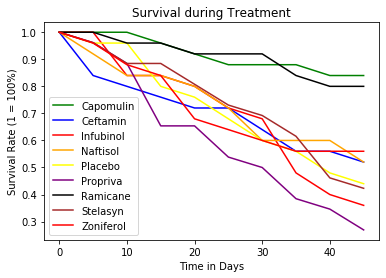

In [307]:
Drug1, = plt.plot(x_axis, TABpercent['Capomulin'], 
                        color="green",label="Capomulin")
Drug2, = plt.plot(x_axis, TABpercent['Ceftamin'], 
                        color="blue",label="Ceftamin")
Drug3, = plt.plot(x_axis, TABpercent['Infubinol'], 
                        color="red",label="Infubinol")
Drug4, = plt.plot(x_axis, TABpercent['Naftisol'], 
                        color="orange",label="Naftisol")
Drug5, = plt.plot(x_axis, TABpercent['Placebo'], 
                        color="yellow",label="Placebo")
Drug6, = plt.plot(x_axis, TABpercent['Propriva'], 
                        color="purple",label="Propriva")
Drug7, = plt.plot(x_axis, TABpercent['Ramicane'], 
                        color="black",label="Ramicane")
Drug8, = plt.plot(x_axis, TABpercent['Stelasyn'], 
                        color="brown",label="Stelasyn")
Drug9, = plt.plot(x_axis, TABpercent['Zoniferol'], 
                        color="red",label="Zoniferol")
#Drug_two, = plt.plot(x_axis, Drug_and_Tumor.loc['Ceftamin',["Tumor Volume (mm3)"]], 
#                        color="blue",label=Drug_and_Tumor.loc['Ceftamin',"Tumor Volume (mm3)"])
# Create a legend for our chart
plt.legend(handles=[Drug1, Drug2, Drug3, Drug4, Drug5,Drug6,Drug7,Drug8,Drug9], loc="best")

plt.title("Survival during Treatment")
plt.xlabel("Time in Days")
plt.ylabel("Survival Rate (1 = 100%)")
plt.show()

In [299]:
## 
#drug_chart=ms_DF8.plot(kind="bar", x="drug", y="effect", grid=True, figsize=(10,5),
#              title="% change in Tumor volume to Treatment")
# Create a legend for our chart
#drug_chart.legend(handles=[Drug, drug_chart], loc="best")

# label the axes
#drug_chart.set_xlabel("Time in Days")
#drug_chart.set_ylabel("Tumor Volumes in (mm3)")
#plt.show()


In [300]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

In [367]:
# create a pivot formating rows as timepoint and columns as drug
#combined_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
tumorVol=combined_df.pivot_table(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
tumorVol

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [368]:
# convert the above Pivot Table of Tumor Volumes to a DF
ms_DF5 = pd.DataFrame(tumorVol)
# reset index to flatten out
ms_DF5.reset_index(inplace = False)
ms_DF5

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [369]:
#-----------------------------------------------------------------------------------------------
#             Calculate the %Volume change of Tumor from Time zero - 45
#-----------------------------------------------------------------------------------------------
loc0=[]
loc4=[]
locf=ms_DF5.loc[0,["Capomulin","Ceftamin","Infubinol","Naftisol","Placebo","Propriva",
                  "Ramicane","Stelasyn","Zoniferol"]]
locl=ms_DF5.loc[45,["Capomulin","Ceftamin","Infubinol","Naftisol","Placebo","Propriva",
                  "Ramicane","Stelasyn","Zoniferol"]]
#ms_DF.loc[0,['Capomulin','Ceftamin']]
locl
loc_perc = (locl-locf)/locf
loc_perc

Drug
Capomulin   -0.194753
Ceftamin     0.425165
Infubinol    0.461235
Naftisol     0.539233
Placebo      0.512980
Propriva     0.472412
Ramicane    -0.223209
Stelasyn     0.520851
Zoniferol    0.465798
dtype: float64

In [370]:
# convert the above series of %Tumor Volumes to a DF
ms_DF7 = pd.DataFrame(loc_perc)
# reset index to flatten out
ms_DF7.reset_index(inplace = True)
ms_DF7

,Drug,0
0,Capomulin,-0.194753
1,Ceftamin,0.425165
2,Infubinol,0.461235
3,Naftisol,0.539233
4,Placebo,0.512980
5,Propriva,0.472412
6,Ramicane,-0.223209
7,Stelasyn,0.520851
8,Zoniferol,0.465798


In [371]:

#loc_perc
#ms_DF7["%Effect"] = loc_perc
#ms_DF7
# alemi5
ms_DF8=ms_DF7.rename(columns={0:"Effectiveness"})
ms_DF8

,Drug,Effectiveness
0,Capomulin,-0.194753
1,Ceftamin,0.425165
2,Infubinol,0.461235
3,Naftisol,0.539233
4,Placebo,0.512980
5,Propriva,0.472412
6,Ramicane,-0.223209
7,Stelasyn,0.520851
8,Zoniferol,0.465798


In [372]:
# DATASET 1
#gyms = ["Crunch", "Planet Fitness", "NY Sports Club", "Rickie's Gym"]
#members = [49, 92, 84, 53]
drugs = ms_DF8["Drug"]
effect=ms_DF8["Effectiveness"]
effect
#len(drugs)

0   -0.194753
1    0.425165
2    0.461235
3    0.539233
4    0.512980
5    0.472412
6   -0.223209
7    0.520851
8    0.465798
Name: Effectiveness, dtype: float64

In [373]:
# Set x axis and tick locations
#x_axis = np.arange(len(drugs))
#x_axis
#tick_locations = [value for value in x_axis]

In [374]:
x_axis = np.arange(0, len(drugs))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
#colors = ["green", "red","yellow","red","red","red","green","red","red"]

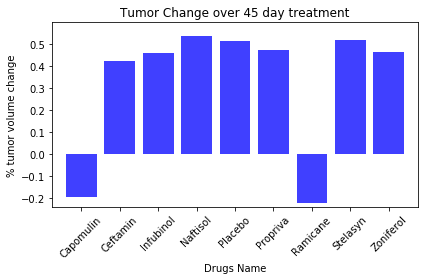

In [201]:
plt.title("Tumor Change over 45 day treatment")
plt.xlabel("Drugs Name")
plt.ylabel("% tumor volume change")

plt.xlim(-0.75, len(drugs)-.25)
#plt.ylim(-0.24, max(effect) + 5)
plt.ylim(-0.24, max(effect) + 0.06)

plt.bar(x_axis, effect, facecolor="blue", alpha=0.75, align="center")
#plt.bar(x_axis, effect, facecolor=colors, alpha=0.75, align="center")
plt.xticks(tick_locations, drugs,rotation=45)
#multi_plot.set_xticklabels(rain_df["State"], rotation=45)
#plt.figsize=(5,20)
# Save the graph and show the graph
plt.tight_layout()
plt.savefig("../Images/alemi_study_effectTumor.png")
plt.show()

In [185]:
## 
#drug_chart=ms_DF8.plot(kind="bar", x="drug", y="effect", grid=True, figsize=(10,5),
#              title="% change in Tumor volume to Treatment")
# Create a legend for our chart
#drug_chart.legend(handles=[Drug, drug_chart], loc="best")

# label the axes
#drug_chart.set_xlabel("Time in Days")
#drug_chart.set_ylabel("Tumor Volumes in (mm3)")
#plt.show()


In [131]:
# Create a list indicating where to write x labels and set figure size to adjust for space
#plt.figure(figsize=(20,3))
#plt.bar(x_axis, ms_DF7['Drug'], color='b', alpha=0.5, align="center")
#plt.xticks(tick_locations, ms_DF7["Drug"], rotation="vertical")

In [132]:

# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

In [134]:
# convert the above Pivot Table to a DF
#ms_DF6 = pd.DataFrame(mouse_survival)
# reset index to flatten out
#ms_DF6.reset_index(inplace = False)
#ms_DF6

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph Alemi3

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)